### Retention
* Retention is the capacity of a business to keep its customers engaged and satisfied over a certain period.
* It is measured by the retention rate, which assesses how well a company meets customer needs and fosters loyalty. 
* High retention indicates that customers find value in the service or product offered.


# Customer Retention analysis and Prediction using Python End-to-End Machine Learning 

##### Importing Modules from diffrent libraries

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


#### Reading csv file for dataset

In [2]:
data=pd.read_csv('Telecom_Customer_churn_dataset.csv')
data

,customerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.value_counts().sum()

7043

## 2.Data Preprocessing:
#### Handle Missing Values:
* Check for missing values in TotalCharges and impute or remove as necessary.
#### Data Type Conversion:
* Ensure TotalCharges is converted to a numeric data type.
#### Encoding Categorical Variables:
* Convert categorical variables into numerical formats suitable for modeling.


In [5]:
data.isnull()

,customerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().value_counts().sum()

7043

In [7]:
data.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Check and confirm if there are null value or dummy data in essential columns
data.TotalCharges.isnull().sum()

0

In [9]:
# Check and confirm there are null value or dummy data in essential columns
data.MonthlyCharges.isnull().sum()

0

#### Since there are no null values in the dataset we will now remove the unwanted columns

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
#Understanding the statistics of numerical columns
numerical_cols = ['TotalCharges', 'tenure', 'MonthlyCharges']
data[numerical_cols].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [12]:
data.drop('customerID',axis=1,inplace=True)

In [13]:
# Drop missing or unnecessary columns
data = data.dropna(axis=1, how='all')       # Drop columns with all NaN values
data

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Convert categorical variables to numerical using Ordinal encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype=int)
data[data.select_dtypes(object).columns] = enc.fit_transform(data.select_dtypes(object))
data

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [15]:
# droping the dummy rows
data = pd.get_dummies(data,drop_first=True)
data

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


### ---------------------------- Data Preprocessing completed --------------------------------------------

## 2. Exploratory Data Analysis (EDA):
#### Distribution Analysis:
* Examine the distribution of numerical features like tenure, MonthlyCharges, and TotalCharges.
#### Correlation Analysis:
* Identify correlations between features and the target variable Churn.
#### Visualization:
* Create visualizations to understand the relationships between features and churn.

In [16]:
data

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


#### 1. Scatter Plot: Tenure vs Monthly Charges
A scatter plot will show the relationship between Tenure (how long a customer has been with the company) and MonthlyCharges (the monthly payment amount). We'll color by the Churn status.

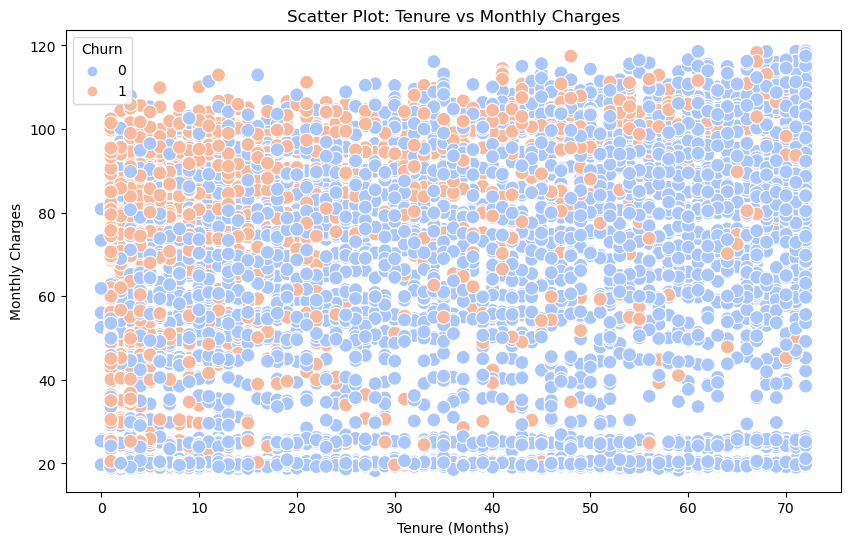

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Tenure vs Monthly Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=data, hue='Churn', palette='coolwarm', s=100)
plt.title('Scatter Plot: Tenure vs Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

#### Inference:

* Churned customers (in red) tend to have lower tenure and higher monthly charges, which indicates that higher-paying, short-term customers might be more likely to churn.
* Long-tenured customers (in blue) tend to have lower monthly charges, which might indicate loyalty and that longer-tenure customers get discounts or promotions.

In [18]:
print(data['Churn'].unique())

[0 1]


#### 2. Line Plot: Retention Rate Over Tenure
This line plot will help us understand how retention rates change as customers stay longer with the company. Typically, customer retention improves as customers stay longer, but this can also reveal early churn trends.

In [19]:
# Calculate the retention rate over tenure
# Retained customers (Churn = 0) and churned customers (Churn = 1)
retention_rate = data.groupby('tenure')['Churn'].value_counts(normalize=True).unstack(fill_value=0)

In [20]:
# Calculate the retention rate (i.e., the percentage of retained customers)
retention_rate['Retention Rate'] = retention_rate[0]  # Churn = 0 means retained

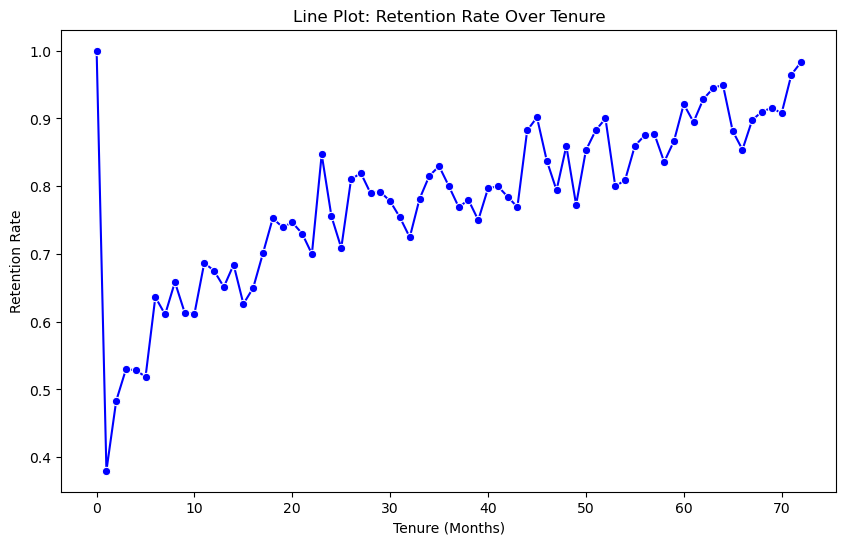

In [21]:
# Line plot: Retention rate over tenure
plt.figure(figsize=(10, 6))
sns.lineplot(x=retention_rate.index, y=retention_rate['Retention Rate'], marker='o', color='b')
plt.title('Line Plot: Retention Rate Over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Retention Rate')
plt.show()

### Inferences:

##### Retention Trends Over Time:
* Retention is low in the initial months but increases as customers stay longer, which is typical for most customer bases. Customers with long tenure are likely to be retained.
* The early churn suggests that new customers (within 0-12 months) are more likely to leave. This could indicate the need for better onboarding or more incentives to retain new customers.
* Companies might want to focus on improving early customer engagement to increase the chances of retention.


### 1. Histogram: Distribution of Monthly Charges
Let's start by visualizing the distribution of MonthlyCharges to understand how charges are spread among customers.

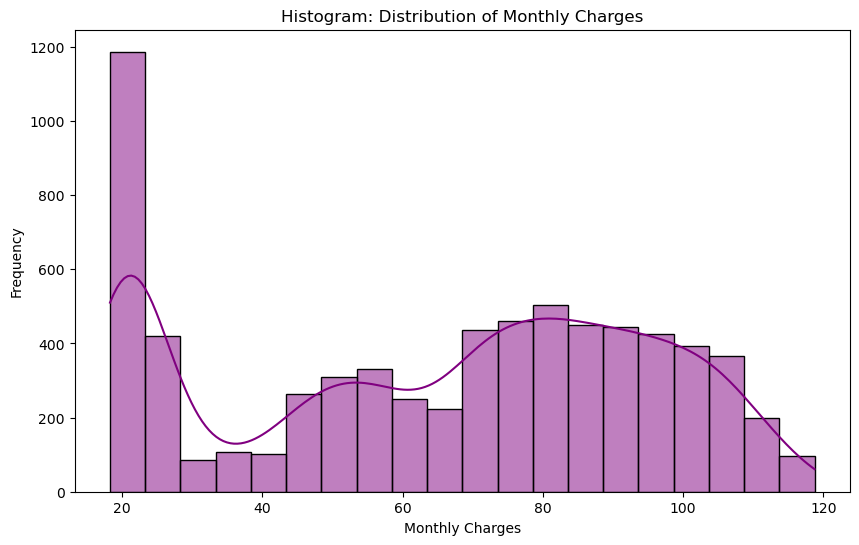

In [22]:
# Histogram: Distribution of Monthly Charges
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], kde=True, color='purple', bins=20)
plt.title('Histogram: Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

### Inferences:

* The distribution of MonthlyCharges is right-skewed, meaning most customers are paying lower amounts, while a small number of customers pay significantly higher amounts.
* This suggests that higher charges may be associated with higher churn rates, especially for customers who are paying more for their services.

### 4. Box Plot: Monthly Charges by Contract Type
A box plot can provide insights into how Monthly Charges vary across different Contract Types (Month-to-Month, One-Year, Two-Year).

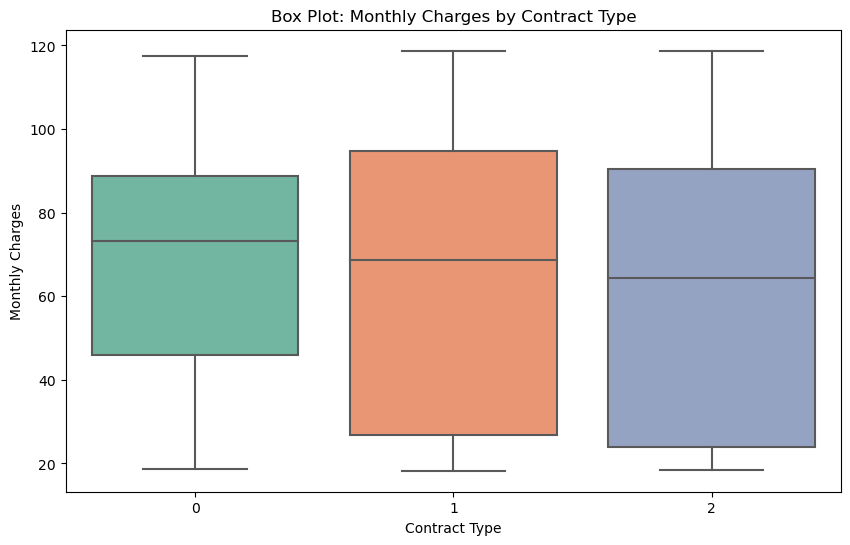

In [23]:
# Box plot: Monthly Charges by Contract Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=data, palette='Set2')
plt.title('Box Plot: Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()

#### Inferences:
* Month-to-month contracts show a wider range of monthly charges, meaning customers on these contracts could be paying significantly more or less, and are more likely to churn.
* One-year and two-year contracts have a narrower range of charges, suggesting that customers on longer contracts may feel they are getting a more stable and predictable rate, which could reduce churn.

#### 5. Pie Chart: Churn Distribution (Retained vs Churned)
A pie chart will show the distribution between retained and churned customers.

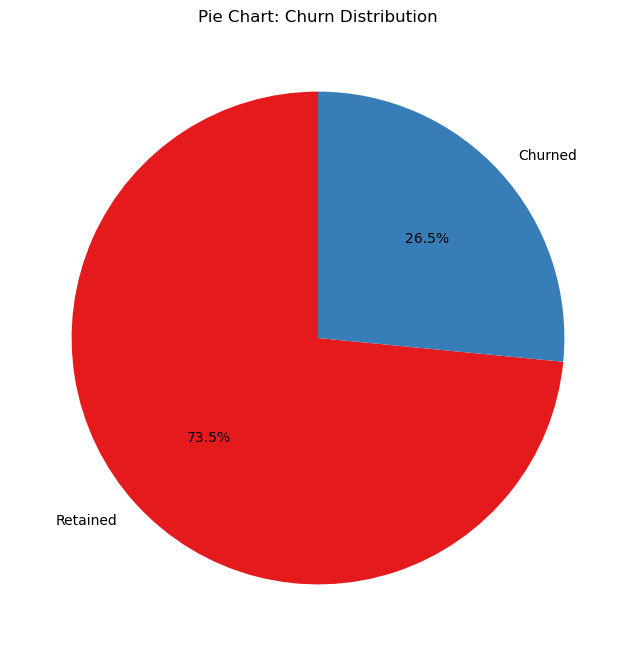

In [24]:
# Pie chart: Churn Distribution (Retained vs Churned)
churn_dist = data['Churn'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_dist, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set1", len(churn_dist)))
plt.title('Pie Chart: Churn Distribution')
plt.show()

##### Inferences:
* A significant portion of customers has churned, implying that the company needs to focus on improving retention strategies.
* Retained customers (those who stayed) should be the focus of loyalty programs and reward systems to maintain their business.

## Conclusion and Actionable Insights:
##### Churn and Tenure: 
Customers with shorter tenures are more likely to churn. The company should focus on engaging new customers (e.g., providing discounts, improving onboarding experiences).

##### Contract Types:
Customers with Month-to-Month contracts show a wider range of charges and are more likely to churn. Offering incentives for customers to opt for longer contracts (1-2 years) could improve retention.

##### Monthly Charges: 
Customers with higher monthly charges are more likely to churn. The company might want to offer promotions or review pricing for customers with high charges.

##### Early Churn: 
Early churn is significant (within the first year). The company can introduce customer loyalty programs, better customer service, and personalized offers to reduce churn in the early months.

# 3.	Modeling:
1) Feature Selection: Select relevant features based on EDA insights.
2) Model Training: Train classification model to predict churn.
3) Model Evaluation: Evaluate models using metrics such as accuracy, precision, recall, and f1_score.

#### Exploring 1. Feature selection

In [25]:
# Split features and target variable
X = data.drop(columns='Churn')  # Features
y = data['Churn']  # Target variable (Churn)

In [26]:
print(X.head())

   Gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [27]:
# Split data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Standardize the features (important for models like Logistic Regression)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Final data preparation for model training
print(f"Training Features shape: {X_train.shape}")
print(f"Testing Features shape: {X_test.shape}")

Training Features shape: (5634, 19)
Testing Features shape: (1409, 19)


#### Exploring 2.Model Training

In [30]:
# Import the necessary libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42,max_iter=1000)

In [32]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
# Predict the test set results
y_pred = log_reg.predict(X_test)

#### Exploring 3.Model Evaluation

In [35]:
# Evaluate the model
print(f"Logistic Regression Model Evaluation:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Logistic Regression Model Evaluation:
Accuracy: 0.8162
Precision: 0.6863
Recall: 0.5630
F1 Score: 0.6186


### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [37]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Predict the test set results
y_pred_rf = rf.predict(X_test)

In [39]:
# Evaluate the model
print(f"Random Forest Model Evaluation:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Random Forest Model Evaluation:
Accuracy: 0.7999
Precision: 0.6679
Recall: 0.4853
F1 Score: 0.5621


### Confusion Matrix

##### Model Evaluation
Next, we'll create a confusion matrix and visualize it with a heatmap to better understand how well our model is performing in terms of true positives, false positives, true negatives, and false negatives.

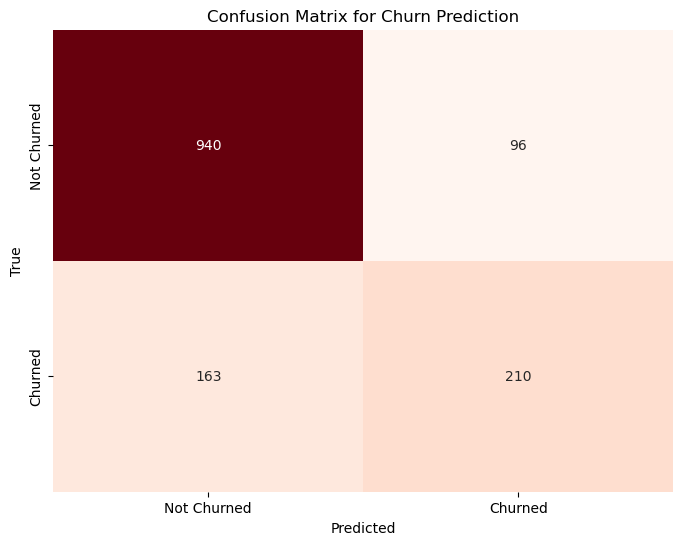

In [40]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix for Churn Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Additional Visualizations (ROC Curve & AUC)
For a more comprehensive evaluation, we can also plot the ROC curve to see how well our model distinguishes between the churned and not churned customers.

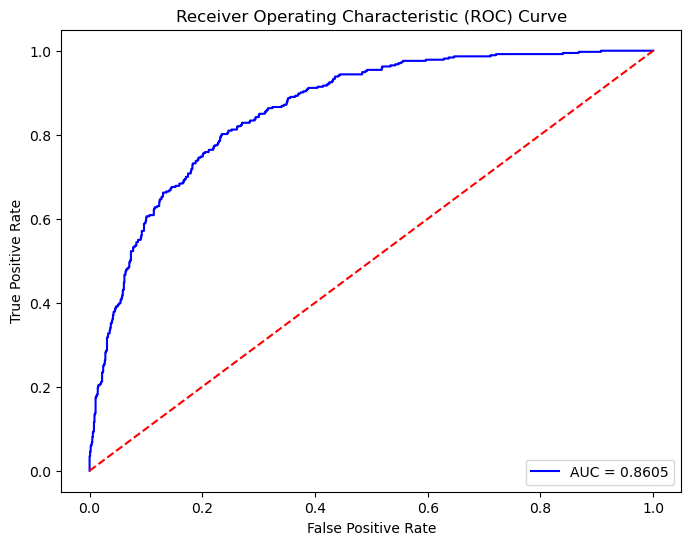

In [47]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Model Inferences
Now that we have trained the logistic regression model and evaluated it, we can interpret the results:

#### Accuracy: 
The accuracy score gives the percentage of correctly classified customers. However, in imbalanced datasets (such as this one, where churned customers might be fewer), accuracy might not give the full picture.
#### Precision:
Precision tells us the percentage of customers predicted to churn that actually did churn.
#### Recall: 
Recall (or sensitivity) indicates the percentage of actual churned customers that the model correctly identified.
#### F1 Score:
This is a harmonic mean of precision and recall, and it's often used when you need a balance between the two.
#### Confusion Matrix: 
This matrix shows how well the model is classifying churned and non-churned customers, helping to identify false positives and false negatives.
#### ROC Curve & AUC: 
The ROC curve and AUC score give an overall sense of the model's ability to distinguish between the classes (churned vs. non-churned).

# 4. Implementation

* Deploy Model: Implement the model to predict customer churn in real-time.
* Actionable Insights: Use model predictions to develop strategies aimed at retaining customers identified as high-risk for churn.

In [41]:
import joblib
# Save Logistic Regression model
joblib.dump(log_reg, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [42]:
# Save Random Forest model
joblib.dump(rf, 'random_forest_model.joblib')
print("Models have been saved successfully.")

Models have been saved successfully.


In [43]:
# go to visual studio to run the program